In [37]:
#import libraries 
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error,mean_absolute_error
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib.pylab import rcParams
import math


from scipy.stats import boxcox
rcParams['figure.figsize']=10,6

In [2]:
df= pd.read_csv('week.csv')

In [3]:
df

,Date,Price,Open,High,Low,Change %,Unnamed: 6,Unnamed: 7
0,3/25/2012,22555.23,22555.23,22555.23,22555.23,1.94%,NaN,NaN
1,4/1/2012,22609.23,22609.23,22609.23,22609.23,0.24%,NaN,NaN
2,4/8/2012,22350.63,22350.63,22350.63,22350.63,-1.14%,NaN,NaN
3,4/15/2012,22400.57,22400.57,22400.57,22400.57,0.22%,NaN,NaN
4,4/22/2012,22216.19,22216.19,22216.19,22216.19,-0.82%,NaN,NaN
...,...,...,...,...,...,...,...,...
548,11/13/2022,33958.13,34126.09,34191.06,33809.20,-1.18%,NaN,NaN
549,11/20/2022,34338.17,34045.37,34453.36,33940.51,1.12%,NaN,NaN
550,11/27/2022,35222.81,34356.51,35222.81,34356.51,2.58%,NaN,NaN
551,12/4/2022,33872.60,35026.20,35026.20,33872.60,-3.83%,NaN,NaN


In [4]:
df.drop('Unnamed: 6', axis=1, inplace=True)

In [5]:
df.drop('Unnamed: 7', axis=1, inplace=True)

In [6]:
df

,Date,Price,Open,High,Low,Change %
0,3/25/2012,22555.23,22555.23,22555.23,22555.23,1.94%
1,4/1/2012,22609.23,22609.23,22609.23,22609.23,0.24%
2,4/8/2012,22350.63,22350.63,22350.63,22350.63,-1.14%
3,4/15/2012,22400.57,22400.57,22400.57,22400.57,0.22%
4,4/22/2012,22216.19,22216.19,22216.19,22216.19,-0.82%
...,...,...,...,...,...,...
548,11/13/2022,33958.13,34126.09,34191.06,33809.20,-1.18%
549,11/20/2022,34338.17,34045.37,34453.36,33940.51,1.12%
550,11/27/2022,35222.81,34356.51,35222.81,34356.51,2.58%
551,12/4/2022,33872.60,35026.20,35026.20,33872.60,-3.83%


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553 entries, 0 to 552
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      553 non-null    object 
 1   Price     553 non-null    float64
 2   Open      553 non-null    float64
 3   High      553 non-null    float64
 4   Low       553 non-null    float64
 5   Change %  553 non-null    object 
dtypes: float64(4), object(2)
memory usage: 26.0+ KB


In [8]:
series=df[['Date','High']]

In [9]:
series=series.set_index(['Date'])

In [10]:
# #Visualize the data
# plt.xlabel('Date')
# plt.ylabel('High')
# plt.plot(series)

In [11]:
#  def decompose(timeseries):
#     timeseries.dropna(inplace=True)
#     decomposition=seasonal_decompose(timeseries)
#     trend=decomposition.trend
#     seasonal=decomposition.seasonal
#     residual=decomposition.resid

#     #create subplots for the data visualization
#     fig, (ax1, ax2,ax3, ax4) =plt.subplots (4, sharex=True, constrained_layout=False)
#     ax1. set_title (" Visualizations for Timeseries,Trend, Seasonality and Resudials" )

#     l1, =ax1.plot(timeseries,color='blue')

#     l2, =ax2.plot(trend,color='red')

#     l3, =ax3.plot(seasonal,color='green')

#     l4, =ax4.plot(residual,color='blue')
#     labels=['Time series','Tremd','Seasonality', 'Residuals']

#     fig.legend(labels=labels, loc= 'lower center', ncol=5)
#     plt.show()

In [12]:
# decompose(series)

In [13]:
# #Determine rolling statistics
# rolmean=series.rolling(window=12).mean()
# rolstd=series.rolling(window=12).std()

# #plot rolling statistics
# orig=plt.plot(series,color='blue',label='Original')
# aveg=plt.plot(rolmean,color='red',label='Rolling Mean')
# std=plt.plot(rolstd,color='green',label='Rolling Std')
# plt.legend(loc='best')
# plt.xlabel('Date')
# plt.title("Rolling Mean and Standard Deviation")
# plt.show ()

In [14]:
# #Perform argumented Dicker Fuller Test
# def adft(timeseries):
#     print('Results of ADFT')
#     adftest=adfuller(timeseries['High'],autolag='AIC')
#     dfout=pd.Series(adftest[0:4],index=['Test Statistic','P-High','#Lags Used','Number of Observations used'])
#     for key, High in adftest[4].items():
#         dfout['Critical High (%s)' %key]=High
#     print(dfout)
# adft(series)

In [15]:
# #remove trend using moving average on log transformed time-series
# #1. log transform the timeseries
# series_lgs= series
# series_lgs['High']=boxcox(series_lgs['High'], lmbda=0.0)
# #2. compute moving average on logged data
# mAvg= series_lgs.rolling(window=12).mean()
# #3.subtract moving average from the log  transformed time series, to detrend the series
# series_dt=series_lgs-mAvg
# series_dt.dropna(inplace=True)

In [16]:
# #decompose the timeseries after detrending
# decompose(series)
# # visualize timeseries after detrending
# plt.xlabel('Date')
# plt.ylabel('High')
# plt.plot(series)

In [17]:
# #remove seasonality using exponential decay transformation
# indf_et=series.ewm(halflife=12, min_periods=0, adjust=True).mean()
# indf_rs=series-indf_et
# indf_rs.dropna(inplace=True)

In [18]:
# #perform ADF test once more
# adft(series)

In [19]:
# # split the dataset into train and test
# ar_val=series.values
# train=ar_val[1:len(ar_val)-10]
# test=ar_val[len(ar_val)-10:]

In [20]:
# #run the model
# model=ARIMA(train, order=(2,1,2))
# model=model.fit(method_kwargs={'warn_convergence':False})
# pred=model.predict(start=len(train),end=len(train)+len(test)-1, dynamic= False)
# ar_score=mean_squared_error(test, pred)
# print('AR MSE: {}'.format(round(ar_score,4)))

In [21]:
# plt.plot(test,label='true values',color='blue')
# plt.plot (pred, label='forecasts',color='red')
# plt. title(' High')
# plt.legend(loc='best')


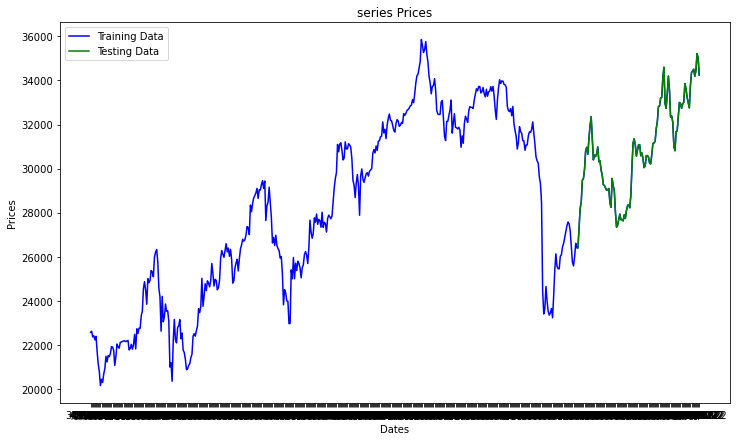

In [22]:
train_data, test_data = series[0:int(len(series)*0.8)], series[int(len(series)*0.8):]
plt.figure(figsize=(12,7))
plt.title('series Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(series['High'], 'blue', label='Training Data')
plt.plot(test_data['High'], 'green', label='Testing Data')
plt.legend()

In [23]:
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

train_ar = train_data['High'].values
test_ar = test_data['High'].values

history = [x for x in train_ar]
print(type(history))
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(5,1,2))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error)
error2 = smape_kun(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error2)

<class 'list'>


d:\anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
d:\anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Testing Mean Squared Error: 274103.660
Symmetric mean absolute percentage error: 1.267


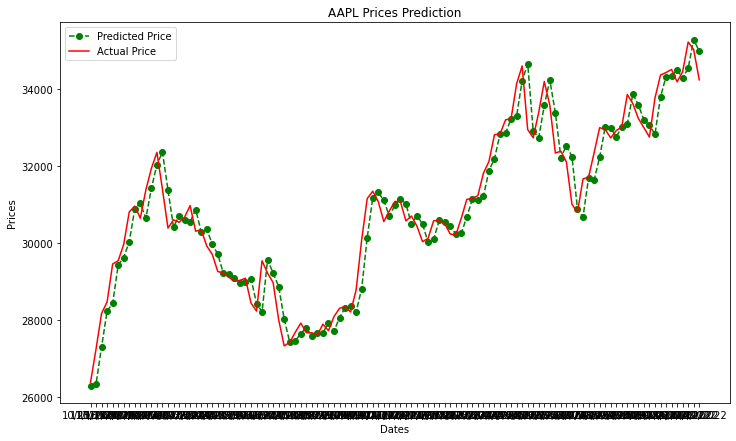

In [24]:
plt.figure(figsize=(12,7))
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data["High"], color='red', label='Actual Price')
plt.title('AAPL Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

In [25]:
actual=pd.DataFrame()
actual=pd.DataFrame(test_ar,columns=["Actual"])
predicted=pd.DataFrame(list(predictions),columns=["Predicted"])
actual=actual.reset_index(drop=True)
predicted=predicted.reset_index(drop=True)
output=pd.concat([actual,predicted],axis=1)
print(output.head(10))

     Actual     Predicted
0  26393.38  26310.203154
1  27257.82  26350.720884
2  28182.56  27316.036710
3  28478.21  28242.194062
4  29463.64  28438.677448
5  29547.97  29438.110119
6  29973.45  29631.612437
7  30814.60  30039.953063
8  30965.08  30894.700330
9  30651.13  31036.240545


In [26]:
series

,High
Date,
3/25/2012,22555.23
4/1/2012,22609.23
4/8/2012,22350.63
4/15/2012,22400.57
4/22/2012,22216.19
...,...
11/13/2022,34191.06
11/20/2022,34453.36
11/27/2022,35222.81


In [31]:
fitted = model.fit()

In [34]:
fc = fitted.forecast(111, alpha=0.05)

In [38]:
# report performance
mse = mean_squared_error(test_data, fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data, fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - test_data)/np.abs(test_data))
print('MAPE: '+str(mape))

MSE: 21283530.097947408
MAE: 4111.432483745742
RMSE: 4613.407644891941


ValueError: Unable to coerce to Series, length must be 1: given 111